<a href="https://colab.research.google.com/github/Vandanamchauhan/MLProjects/blob/myprojects/Medicalcostprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Projects/medical insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isnull().count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [ ]:
df.smoker.replace(('yes','no'),(1,0), inplace=True)
df.sex.replace(('male', 'female'),(1,0), inplace= True)
df.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [ ]:
df['age'].nunique() 

47

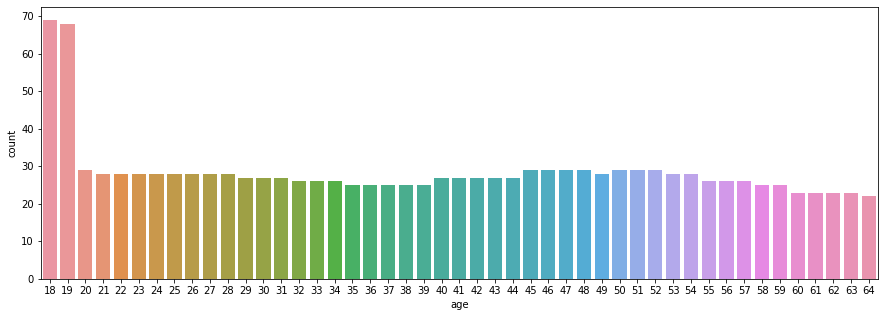

In [ ]:
plt.figure(figsize = (15,5))
sb.countplot(x= 'age', data= df)
plt.show()

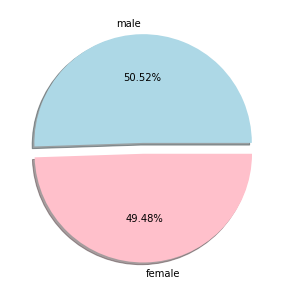

In [ ]:
plt.figure(figsize= (5,5))
labels = ['male', 'female']
size = df['sex'].value_counts()
colors = ['lightblue','pink']
explode= [0,0.1]
plt.pie(size, labels= labels, colors= colors, explode= explode, autopct = '%.2f%%', shadow = True )
plt.show()

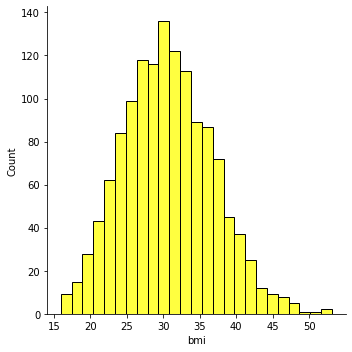

In [ ]:
sb.displot(df.bmi, color ='yellow' )

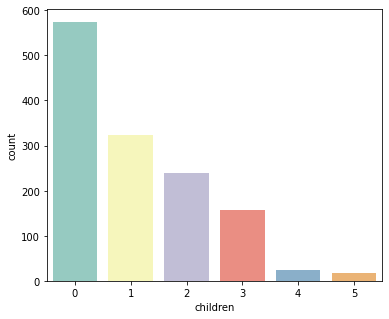

In [ ]:
plt.figure(figsize = (6,5))
sb.countplot( x= 'children',data = df, palette = 'Set3')
plt.show()

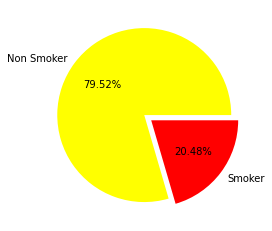

In [ ]:
labels = ['Non Smoker', 'Smoker']
size = df['smoker'].value_counts()
colors = ['yellow', 'red']
explode = (0,0.1)
plt.pie(size, labels = labels, colors = colors, explode = explode,autopct = '%.2f%%')
plt.show()

<function matplotlib.pyplot.show>

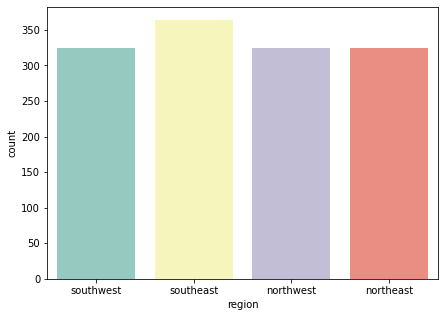

In [ ]:
plt.figure(figsize= (7,5))
sb.countplot(x= 'region', data = df, palette= 'Set3')
plt.show

<Figure size 504x360 with 0 Axes>

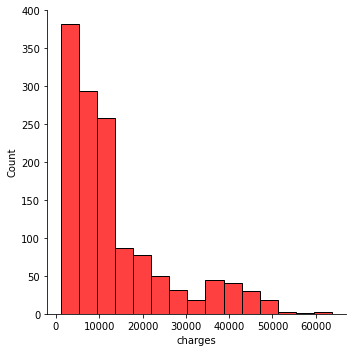

In [ ]:
plt.figure(figsize= (7,5))
sb.displot(df.charges , color = 'red', bins= 15)
plt.show()

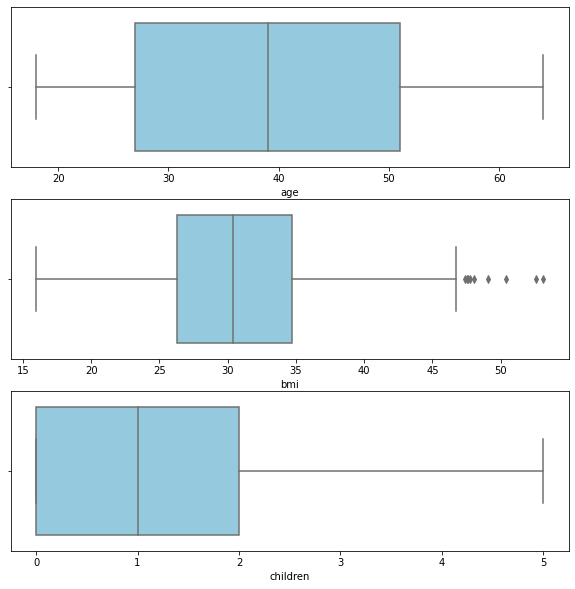

In [ ]:
box = df[['age', 'bmi', 'children']]
plt.figure(figsize= (10,10), facecolor= 'white')
plotnumber = 1

for column in box:
  if plotnumber <= 3:
    ax = plt.subplot(3,1,plotnumber)
    sb.boxplot(x= box[column], color= 'skyblue')
    plt.xlabel(column, fontsize = 10)
  
  plotnumber+=1
plt.show()

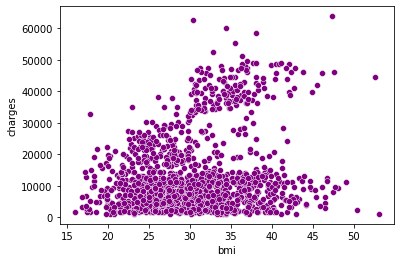

In [ ]:
sb.scatterplot(x = 'bmi',y='charges', data = df, color='purple')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


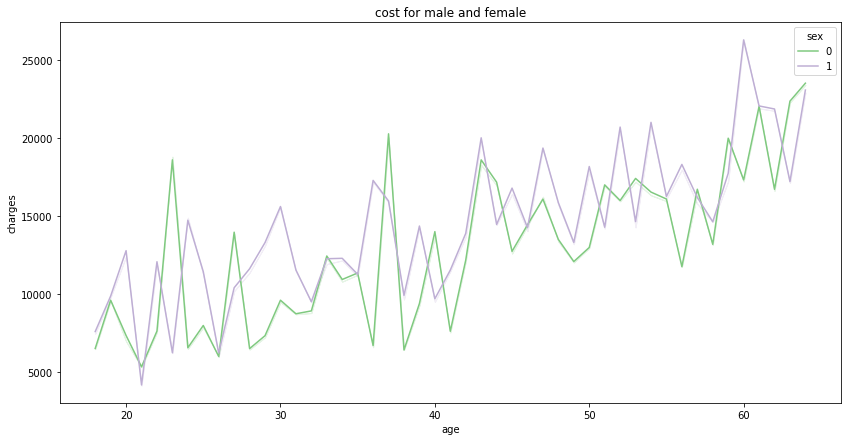

In [ ]:
plt.figure(figsize= (14,7))
sb.lineplot(df['age'],df['charges'],hue= df['sex'],ci= 0, palette= 'Accent').set(title= 'cost for male and female')
plt.legend=(1,1)
plt.show()

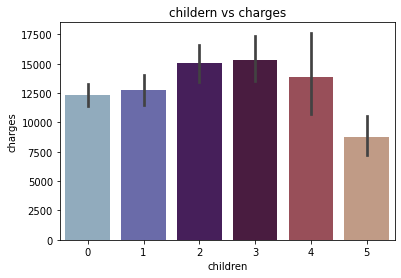

In [ ]:
sb.barplot(x= df.children, y= df.charges,palette='twilight').set(title='childern vs charges')
plt.show()

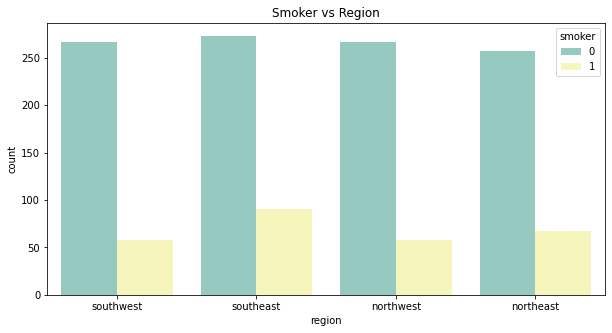

In [ ]:
plt.figure(figsize = (10,5))
sb.countplot(x='region', hue= 'smoker', palette= 'Set3', data= df).set(title="Smoker vs Region")
plt.show()

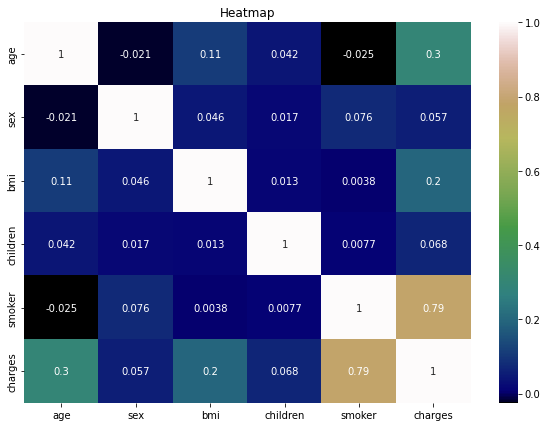

In [ ]:
plt.figure(figsize=(10,7))
sb.heatmap(df.corr(),annot = True, cmap= 'gist_earth')
plt.title("Heatmap")
plt.show()

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df['smoker'].unique()

array([1, 0])

In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
df.region = df.region.map({'southwest':0,'southeast':1,'northwest':2,'northeast':3})
df['region'].unique()

array([0, 1, 2, 3])

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [ ]:
x= df.iloc[:,0:-1]
y= df.charges


x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,0
1,18,1,33.770,1,0,1
2,28,1,33.000,3,0,1
3,33,1,22.705,0,0,2
4,32,1,28.880,0,0,2
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2
1334,18,0,31.920,0,0,3
1335,18,0,36.850,0,0,1
1336,21,0,25.800,0,0,0


In [ ]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.25, random_state = 42)

In [ ]:
x_train.shape

(1003, 6)

In [ ]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(x_train,y_train)

x_test_predict = LR.predict(x_test)

In [ ]:
x_train_predict = LR.predict(x_train)
x_train_predict

array([ 1841.97541608,  4351.61796476, 14096.02955164, ...,
       11488.96161685, 37122.4816677 , 11404.8151864 ])

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

train_score = r2_score(y_train,x_train_predict)

print('Linear Regression training score =' , train_score)

Linear Regression training score = 0.7449087316606229


In [ ]:
test_score = r2_score(y_test,x_test_predict)

print('Linear Regression testing score =',test_score)


Linear Regression testing score = 0.7668905583460908


In [ ]:
print('MSE :', mean_squared_error(y_train,x_train_predict))
print('MAE :', mean_absolute_error(y_train,x_train_predict))

MSE : 37011292.58315399
MAE : 4182.66994436675


In [ ]:
print('MSE :', mean_squared_error(y_test,x_test_predict))
print('MAE :', mean_absolute_error(y_test,x_test_predict))

MSE : 35174149.32705306
MAE : 4252.8564557923655


In [ ]:
import math
print (math.sqrt(mean_squared_error(y_test,x_test_predict)))

5930.779824530081
